# Modeling

NLP applied to Kaggle dataset:
https://www.kaggle.com/datasets/stackoverflow/stacksample

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

from ast import literal_eval

set_style("whitegrid")

## Read in part of the data

In [2]:
questions = pd.read_csv("archive/questions_cleaned.csv", nrows=100000, 
                        converters={'cleaned_body': literal_eval})

In [3]:
questions.sample(5, random_state=234)

,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body
23390,23390,23390,1265190,147800.0,2009-08-12T09:35:05Z,NaN,20,Django annotate() multiple times causes wrong ...,<p>Django has the great new annotate() functio...,Django has the great new annotate() function f...,"[Django, great, new, annotate, function, query..."
96923,96923,96923,4082150,495246.0,2010-11-02T21:13:10Z,NaN,2,JSF 2.0 + Icefaces 2.0.0 Beta2 and Tomcat 7 fa...,<p>I have an existing JSF 2.0 project working ...,I have an existing JSF 2.0 project working on ...,"[exist, JSF, 2.0, project, work, Tomcat, 7.0.4..."
90312,90312,90312,3847040,289995.0,2010-10-02T18:34:38Z,NaN,3,Where can you download a chm version of the JP...,<p>I'm tired of navigating Oracle's joke of a ...,I'm tired of navigating Oracle's joke of a web...,"[tired, navigate, Oracle, joke, website, JPA, ..."
86983,86983,86983,3728830,391104.0,2010-09-16T16:46:22Z,NaN,25,C# - What will I miss if I start with .NET 2.0?,"<p>I got a book named ""Pro C# 2005 and the .NE...","I got a book named ""Pro C# 2005 and the .NET 2...","[get, book, name, pro, c, 2005, .net, 2.0, Pla..."
37271,37271,37271,1855850,220388.0,2009-12-06T16:50:34Z,NaN,0,Problem with MySQL query,"<p>I have three tables (<em>user</em>, <em>fri...","I have three tables (user, friends, posts) and...","[table, user, friend, post, user, user1, user2..."


## Report number of closed and open questions in the dataset

In [4]:
count = 0
for i in range(0,np.shape(questions)[0]):
    if pd.isna(questions.iloc[i].ClosedDate):
        count = count+1
        
print("Number of closed questions:", count)
print("Number of open questions:", np.shape(questions)[0] - count)

Number of closed questions: 96669
Number of open questions: 3331


Let's define a new column of 0s and 1s that indicates if the question is still open (0) or if it has been closed (1).

In [7]:
questions['Closed'] = 1

for i in range(0,np.shape(questions)[0]):
    if pd.isna(questions.iloc[i].ClosedDate):
        questions['Closed'].iloc[i] = 0

questions.head(5)

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body,Closed
0,0,0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,I've written a database generation script in S...,"[write, database, generation, script, SQL, wan...",0
1,1,1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Are there any really good tutorials explaining...,"[good, tutorial, explain, branching, merge, Ap...",1
2,2,2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Has anyone got experience creating SQL-based A...,"[get, experience, create, SQL, base, ASP.NET, ...",0
3,3,3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,This is something I've pseudo-solved many time...,"[pseudo, solve, time, find, solution, stick, p...",0
4,4,4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,I have a little game written in C#. It uses a ...,"[little, game, write, C, use, database, end, t...",0


## Define dataset for the rest of the notebook

In [8]:
dataset = questions

## Secondary cleaning

Do a small amount of secondary cleaning to remove non-ascii characters, single digit numbers, extraneous punctuation, and short (1 to 3 character) words that survived the first cleaning.

In [9]:
import re

In [10]:
def clean_text(text):

    for i in range(0,len(text)):
        # remove the random non-ascii characters
        text[i] = text[i].encode("ascii", "ignore").decode()
        
        # remove numbers
        text[i] = re.sub(r'[0-9]+', '', text[i])
        
        # remove anything that isn't a word or whitespace
        text[i] = re.sub(r'[^\w\s]', '', text[i])    
        
        # remove short words with 1 to 3 characters
        shortword = re.compile(r'\W*\b\w{1,3}\b')
        text[i] = shortword.sub('', text[i])
        
        
    # some of the above re calls replaced things with empty strings, so now let's remove those    
    while("" in text) :
        text.remove("")    
        
    return text

In [11]:
dataset['cleaned_body'] = list(map(clean_text, dataset.cleaned_body))

In [12]:
dataset.head(3)

,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body,Closed
0,0,0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,I've written a database generation script in S...,"[write, database, generation, script, want, ex...",0
1,1,1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Are there any really good tutorials explaining...,"[good, tutorial, explain, branching, merge, Ap...",1
2,2,2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Has anyone got experience creating SQL-based A...,"[experience, create, base, ASPNET, site, provi...",0


In [13]:
dataset[['Id', 'Score', 'Title', 'Body', 'body_text', 'cleaned_body', 'Closed']].sample(3, random_state=151)

,Id,Score,Title,Body,body_text,cleaned_body,Closed
16788,967080,1,Is there a way to avoid the additional cast Li...,<p>Is there any way for me to avoid the additi...,Is there any way for me to avoid the additiona...,"[avoid, additional, cast, cast, List, collecti...",0
53350,2500940,2,"In DDD, how do you work with multiple reposito...",<p>What do you do if you need to generate a re...,What do you do if you need to generate a read-...,"[need, generate, read, list, datum, page, data...",0
73599,3248170,3,How can be printed ordered list from number 6 ...,<p>How can be printed ordered list from number...,How can be printed ordered list from number 6 ...,"[print, order, list, number, html, possible, e...",0


## Introduction to bag of words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# This is the name of the model, so we're just making the object
onegram_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False) 

# Show the model all of our words and fit it, i.e. create a vector featuring every word in the data set
x = onegram_converter.fit_transform(dataset['cleaned_body'])     

# This method will return a list of all the words in our document
words = onegram_converter.get_feature_names_out()       

# This prints (part of) all the unique words in our document
print(words)                                           

# This is the number of unique words in our document
len(words)                                             

['AAAA' 'AAAAA' 'AAAAAAA' ... 'zzzzzzz' 'zzzzzzzzzzzzdifferent'
 'zzzzzzzzzzzzzzzzzzzzzzzzz']


490952

Notably, some of those "words" are still not quite words, despite all the cleaning we did. This is a result of people asking questions like, "I want to manipulate a string 'AAAA'..." Thankfully, those kinds of examples aren't ubiquitous so while the "word" does appear in our vector, it won't have many counts.

This model can also create vectors of word combinations (bigrams, trigrams, etc.), where instead of counting how frequently a single word appears, it counts how frequently two or three words appear together at the same time. Examples of this are given below, but we chose not to implement them in our analysis because of how we cleaned our data. By removing stopwords, punctuation, short words, etc. beforehand it becomes less clear how a single word is connected to its neighbors without the grammatical context.

In [17]:
#twogram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[2,2], lowercase=False)                                                        
#x2 = twogram_converter.fit_transform(dataset['cleaned_body'])         

# "bigrams" is now a list of all the 2-word combinations in our document
#bigrams = twogram_converter.get_feature_names_out()       

#print(bigrams)                                           
#len(bigrams)    

In [18]:
#threegram_converter = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False)                                                        
#x3 = threegram_converter.fit_transform(dataset['cleaned_body'])         

# "trigrams" is now a list of all the 3-word combinations in our document
#trigrams = threegram_converter.get_feature_names_out()       

#print(trigrams)                                           
#len(trigrams)    

# Logistic regression with our bag of words

Here, we implement a logistic regression model that takes, as features, the words in a given question and outputs a prediction of whether or not that question will be closed or open.

## Split all of our data into training and testing blocks

In [19]:
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text

In [20]:
training_data, test_data = sklearn.model_selection.train_test_split(dataset.copy(), shuffle=True, 
                                                                    test_size = 0.3, random_state=961,
                                                                    stratify = dataset.Closed)

In [21]:
print(training_data.shape)
print(test_data.shape)

(70000, 12)
(30000, 12)


Note that the stratify keyword preserves the number of 'Closed' questions in the training and test sets.

In [22]:
print("Number of open (0) and closed (1) questions in total:\n", dataset.Closed.value_counts(normalize=True))
print("Number of open (0) and closed (1) questions in training data:\n", training_data.Closed.value_counts(normalize=True))
print("Number of open (0) and closed (1) questions in test data:\n", test_data.Closed.value_counts(normalize=True))

Number of open (0) and closed (1) questions in total:
 0    0.96669
1    0.03331
Name: Closed, dtype: float64
Number of open (0) and closed (1) questions in training data:
 0    0.966686
1    0.033314
Name: Closed, dtype: float64
Number of open (0) and closed (1) questions in test data:
 0    0.9667
1    0.0333
Name: Closed, dtype: float64


Make the model and fit it to our training data. Again, we're just making a bag of words (and not a bag of n-grams).

In [24]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[1,1], lowercase=False) 

X_tr_bow = bow_transform.fit_transform(training_data['cleaned_body'])

Check the number of unique words. Note it's smaller than the onegram above because the model has only seen the questions from the training set.

In [25]:
len(bow_transform.vocabulary_)

365109

This method shows us the actual "words" we've put in the "training" bag.

In [26]:
bow_transform.get_feature_names_out()

array(['AAAA', 'AAAAA', 'AAAAAAA', ..., 'zzzzzza', 'zzzzzzz',
       'zzzzzzzzzzzzdifferent'], dtype=object)

And this methods shows us how to map from a word to the index in the bag "array" where that word appears, e.g. 'google' appears at index 187,785. Note these are *not* word counts.

In [27]:
first10pairs = {k: bow_transform.vocabulary_[k] for k in list(bow_transform.vocabulary_)[:10]}

print(first10pairs)

{'google': 187785, 'memory': 237910, 'issue': 218097, 'associate': 112693, 'UIImage': 90429, 'come': 136470, 'thread': 335403, 'talk': 325667, 'problem': 278210, 'real': 285334}


This is the shape of our training data. Here, 70,000 rows (one row for each StackOverflow question in the training set) and 365,109 columns (one column for each word in our vocabulary).

In [28]:
X_tr_bow.shape

(70000, 365109)

There's not a built-in/easy way to get a list of words and their frequencies out, but this approach was given as an answer on a StackOverflow question:

In [29]:
freqs = zip(bow_transform.get_feature_names_out(), X_tr_bow.sum(axis=0).tolist()[0])    
# sort from largest to smallest
freqs_sort = sorted(freqs, key=lambda x: -x[1])

print(freqs_sort[0:20])

[('like', 31086), ('file', 28909), ('code', 27712), ('work', 26717), ('want', 24398), ('class', 22135), ('need', 20137), ('return', 19803), ('user', 17813), ('public', 17284), ('create', 17166), ('value', 16951), ('function', 16613), ('error', 16086), ('thank', 15999), ('know', 15730), ('application', 15533), ('string', 15432), ('datum', 14384), ('object', 14152)]


This means "like" appears 31,086 times in our questions, "file" 28,909 times in our questions, "code" 27,712 times, etc. We can make a histogram of these most common words.

In [51]:
num_words = 30
top_words = []
top_word_counts = []

for i in range(0,num_words):
    top_words.append(freqs_sort[i][0])
    top_word_counts.append(freqs_sort[i][1])

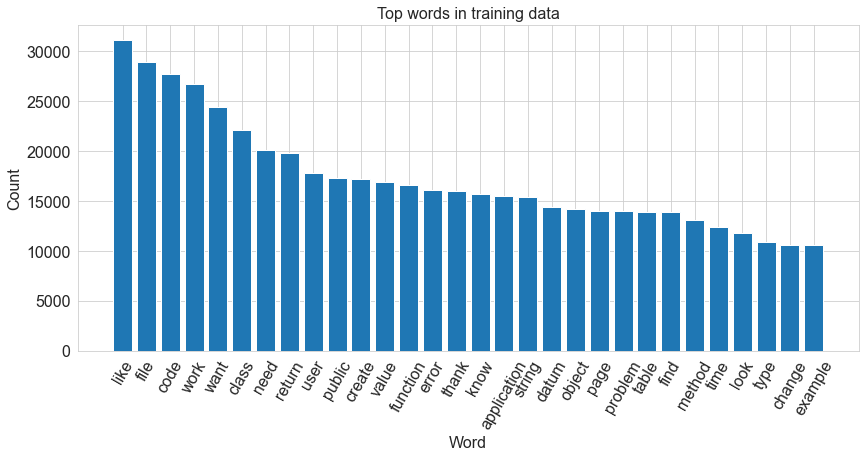

In [55]:
fig = plt.figure(figsize=(14,6))

plt.bar(top_words, top_word_counts)

plt.title("Top words in training data", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Word", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(rotation = 60, fontsize=16)
plt.show()

We should do all the same stuff for our test data as well.

In [56]:
X_te_bow = bow_transform.transform(test_data['cleaned_body'])

In [57]:
y_tr = training_data['Closed']
y_te = test_data['Closed']

## And now for the logistic regression

In [58]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C, max_iter=1000).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

In [59]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

Test Score with bow features 0.9675


### Accuracy discussion

From the documentation for LogisticRegression, 'score' returns the mean accuracy on the given test data and labels. We can check this by looking at the actual predictions the normal way.

In [69]:
y_bow_test_pred_proba = model_bow.predict_proba(X_te_bow)

# set a cutoff
cutoff = 0.5

# assign a value based on the cutoff
y_bow_test_cutoff = 1*(y_bow_test_pred_proba[:,1] >= cutoff)

# print the accuracy
print("The test accuracy for a cutoff of",cutoff,
      "is", np.sum(y_bow_test_cutoff == y_te)/len(y_te))

The training accuracy for a cutoff of 0.5 is 0.9675


In [73]:
# Plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_test_pred = 1*(y_bow_test_pred_proba[:,1] >= cutoff)
    accs.append(np.sum(y_test_pred == y_te)/len(y_te))

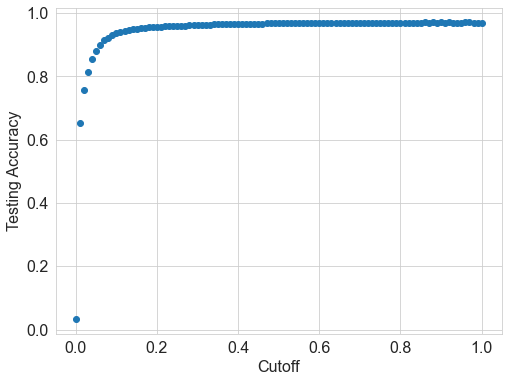

In [78]:
plt.figure(figsize=(8,6))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Testing Accuracy",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

That's an interesting plot. It seems to imply that above a certain cutoff, the accuracy for the testing data doesn't change. This is likely a reflection of the underlying data -- recall the proportion of closed versus open questions we in our overall dataset. We can check that by doing this same plot for the training data.

In [82]:
y_bow_train_pred_proba = model_bow.predict_proba(X_tr_bow)

# set a cutoff
cutoff = 0.5

# assign a value based on the cutoff
y_bow_train_cutoff = 1*(y_bow_train_pred_proba[:,1] >= cutoff)

# print the accuracy
print("The training accuracy for a cutoff of",cutoff,
      "is", np.sum(y_bow_train_cutoff == y_tr)/len(y_tr))

The training accuracy for a cutoff of 0.5 is 0.9846142857142857


In [83]:
# Plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_bow_train_pred_proba[:,1] >= cutoff)
    accs.append(np.sum(y_train_pred == y_tr)/len(y_tr))

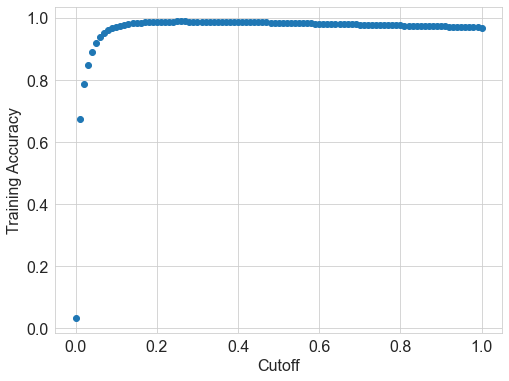

In [84]:
plt.figure(figsize=(8,6))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

The training plot is similar, so again, this points to the underlying full dataset.

### Confusion matrix

We can also look at the confusion matrix to assess how well our predictions are doing.

In [85]:
y_bow_test_pred = model_bow.predict(X_te_bow)

confusion_matrix(y_te, y_bow_test_pred)

array([[28804,   197],
       [  778,   221]], dtype=int64)

In [87]:
TN = confusion_matrix(y_te, y_bow_test_pred)[0,0]
print("True negatives:", TN)
FP = confusion_matrix(y_te, y_bow_test_pred)[0,1]
print("False positives:", FP)
FN = confusion_matrix(y_te, y_bow_test_pred)[1,0]
print("False negatives:", FN)
TP = confusion_matrix(y_te, y_bow_test_pred)[1,1]
print("True positives:", TP)

print("The testing recall is",
         np.round(TP/(TP+FN),4))

print("The testing precision is",
         np.round(TP/(TP+FP),4))

True negatives: 28804
False positives: 197
False negatives: 778
True positives: 221
The testing recall is 0.2212
The testing precision is 0.5287


Based on the testing recall value, out of all the closed questions, this model correctly predicted ~22% of them.
Based on the testing precision value, out of all the questions predicted to be closed, ~52% were actually closed.

### Precision-recall curve

We can better capture this precision-recall behavior in a plot.

In [88]:
cutoffs = np.arange(0.001,.975,.001)

prec_scores = []
rec_scores = []

for cutoff in cutoffs:
    pred = 1*(model_bow.predict_proba(X_te_bow)[:,1] >= cutoff)
    
    prec_scores.append(precision_score(y_te, pred))
    rec_scores.append(recall_score(y_te, pred))

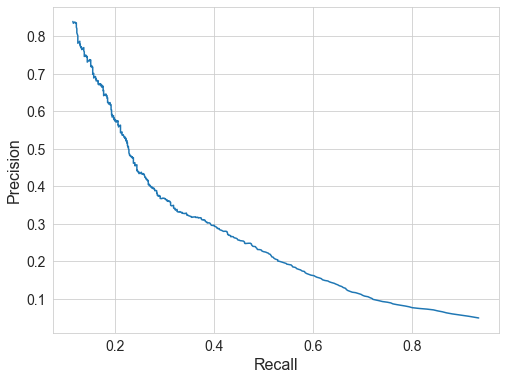

In [89]:
plt.figure(figsize=(8,6))

plt.plot(rec_scores, prec_scores)

plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

### ROC curve

A this ROC curve is going to tell us if we're doing any better than randomly guessing if questions are closed or open.

In [90]:
from sklearn.metrics import roc_curve

In [91]:
## First input the true values
## Then input the predicted probability for class 1
## the fprs, tprs and cutoffs are returned in that order
fprs, tprs, cutoffs = roc_curve(y_te, model_bow.predict_proba(X_te_bow)[:,1])

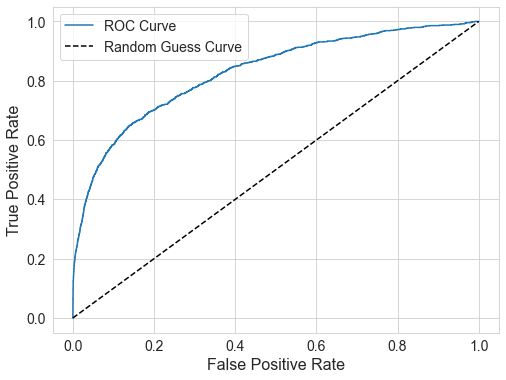

In [92]:
plt.figure(figsize=(8,6))

plt.plot(fprs, tprs, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--', label="Random Guess Curve")


plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.show()

Since the ROC curve is above the random guess curve, yes we are doing better than randomly guessing -- though there is still room for improvement.

### Logistic regression parameters

We can vary the C parameter in the logistic regression to make sure we aren't overfitting. I had to include a max_iter on LogisticRegression() here because the default max_iter=100 wasn't converging.

In [93]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = sklearn.model_selection.GridSearchCV(LogisticRegression(max_iter=1000), cv=5, param_grid=param_grid_)

In [94]:
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [95]:
bow_search.best_score_

0.9695714285714285

In [96]:
bow_search.best_params_

{'C': 0.1}

The best C parameter seems reasonable and is only slightly smaller than the default value (1.0) used above.

In [97]:
bow_search.cv_results_

{'mean_fit_time': array([ 1.96393342,  1.98226295,  5.29299593, 11.05642061, 19.95029259,
        34.44261322]),
 'std_fit_time': array([0.12708944, 0.24099099, 0.0969294 , 0.07578296, 0.57025556,
        2.0869943 ]),
 'mean_score_time': array([0.00438809, 0.0049809 , 0.00358243, 0.00458207, 0.00401306,
        0.00389037]),
 'std_score_time': array([1.01702744e-03, 2.98637139e-05, 4.82100369e-04, 1.01352943e-03,
        6.13973255e-04, 6.60229056e-04]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.96671429, 0.96671429, 0.97021429, 0.968     , 0.95892857,
        0.94614286]),
 'split1_test_score': array([0.96671429, 0.96671429, 0.96857143, 0.96692857, 0.96064286,
        0.947     ]),
 'split2_test_score': array([0.9

In [98]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score']})
search_results

,bow
0,0.966686
1,0.966686
2,0.969571
3,0.967300
4,0.959629
5,0.947143


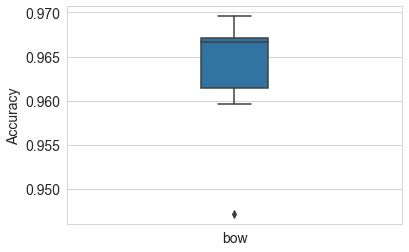

In [101]:
%matplotlib inline
ax = sns.boxplot(data=search_results, width=0.2)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)

In [100]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])

Test Score with bow features 0.97
